In [1]:
# HOMEWORK 1 ZHORA POGHOSYAN

In [109]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

In [111]:
# Exercise 19

class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-4):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.weights = None
        self.bias = None
        self.classes_ = None
        
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def one_hot_encode(self, y):
        n_classes = len(np.unique(y))
        return np.eye(n_classes)[y]
    
    def cross_entropy_loss(self, y_true, y_pred):
        n_samples = y_true.shape[0]
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return -np.sum(y_true * np.log(y_pred)) / n_samples
    
    def fit(self, X, y, X_val=None, y_val=None):
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        
        self.weights = np.random.randn(n_features, n_classes) * 0.01
        self.bias = np.zeros(n_classes)
        
        y_one_hot = self.one_hot_encode(y)
        
        if X_val is not None and y_val is not None:
            y_val_one_hot = self.one_hot_encode(y_val)
            best_loss = float('inf')
            best_weights = None
            best_bias = None
            patience = 10
            patience_counter = 0
        
        for iteration in range(self.max_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.softmax(z)
            
            error = y_pred - y_one_hot
            weights_grad = np.dot(X.T, error) / n_samples
            bias_grad = np.sum(error, axis=0) / n_samples
            
            self.weights -= self.learning_rate * weights_grad
            self.bias -= self.learning_rate * bias_grad
            
            train_loss = self.cross_entropy_loss(y_one_hot, y_pred)
            
            if X_val is not None and y_val is not None:
                val_z = np.dot(X_val, self.weights) + self.bias
                val_pred = self.softmax(val_z)
                val_loss = self.cross_entropy_loss(y_val_one_hot, val_pred)
                
                if val_loss < best_loss - self.tolerance:
                    best_loss = val_loss
                    best_weights = self.weights.copy()
                    best_bias = self.bias.copy()
                    patience_counter = 0
                else:
                    patience_counter += 1
                    
                if patience_counter >= patience:
                    print(f"Early stopping triggered at iteration {iteration}")
                    self.weights = best_weights
                    self.bias = best_bias
                    break
                    
            elif iteration > 0:
                if abs(prev_loss - train_loss) < self.tolerance:
                    print(f"Converged at iteration {iteration}")
                    break
                    
            prev_loss = train_loss
            
            if iteration % 100 == 0:
                print(f"Iteration {iteration}, Training Loss: {train_loss:.4f}")
    
    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.softmax(z)
    
    def predict(self, X):
        probs = self.predict_proba(X)
        return np.argmax(probs, axis=1)


In [114]:
# Exercise 20
import numpy as np

class SimpleLinearRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.theta0 = 0
        self.theta1 = 0
    
    def predict(self, X):
        return self.theta0 + self.theta1 * X
    
    def compute_cost(self, X, y):
        n = len(X)
        predictions = self.predict(X)
        return (1/(2*n)) * np.sum((predictions - y) ** 2)
    
    def fit(self, X, y):
        n = len(X)
        cost_history = []
        
        for iteration in range(self.max_iterations):
            predictions = self.predict(X)
            gradient_theta0 = (1/n) * np.sum(predictions - y)
            gradient_theta1 = (1/n) * np.sum((predictions - y) * X)
            
            temp_theta0 = self.theta0 - self.learning_rate * gradient_theta0
            temp_theta1 = self.theta1 - self.learning_rate * gradient_theta1
            
            self.theta0 = temp_theta0
            self.theta1 = temp_theta1
            
            cost = self.compute_cost(X, y)
            cost_history.append(cost)
            
            if iteration > 0 and abs(cost_history[-2] - cost_history[-1]) < self.tolerance:
                print(f"Converged at iteration {iteration}")
                break
                
            if iteration % 100 == 0:
                print(f"Iteration {iteration}, Cost: {cost:.4f}")
        
        return cost_history

X = np.array([5.6, 7.2, 3.1, 4.4, 1.0, 6.7, 1.2, 5.4, 9.8, 2.2, 
              3.5, 20.0, 17.6, 1.3, 1.7, 2.4, 5.4, 6.8, 4.9, 19.0])
y = np.array([75000, 120000, 47000, 37000, 16000, 140000, 14000, 80000, 
              150000, 16000, 50000, 160000, 165000, 17500, 20000, 20000, 
              84000, 93000, 75000, 140000])

X = (X - np.mean(X)) / np.std(X)

model = SimpleLinearRegression(learning_rate=0.01, max_iterations=1000)
cost_history = model.fit(X, y)

print(f"Final parameters: theta0 = {model.theta0:.4f}, theta1 = {model.theta1:.4f}")
print(f"Final cost: {cost_history[-1]:.4f}")

sample_x = X[0]
prediction = model.predict(sample_x)
print(f"Prediction for normalized X = {sample_x:.4f}: {prediction:.4f}")

Iteration 0, Cost: 4176247633.9552
Iteration 100, Cost: 846845567.5688
Iteration 200, Cost: 400773361.2429
Iteration 300, Cost: 341008752.0762
Iteration 400, Cost: 333001509.1720
Iteration 500, Cost: 331928701.3712
Iteration 600, Cost: 331784966.9309
Iteration 700, Cost: 331765709.4373
Iteration 800, Cost: 331763129.3246
Iteration 900, Cost: 331762783.6419
Final parameters: theta0 = 75971.7201, theta1 = 45526.9968
Final cost: 331762737.4730
Prediction for normalized X = -0.1511: 69091.4382


Iteration 0, Cost: 9.2633
Converged at iteration 56
Final parameters: [0.84927697 0.27282038 1.82014078]
Final cost: 0.1395
R² score: 0.9557


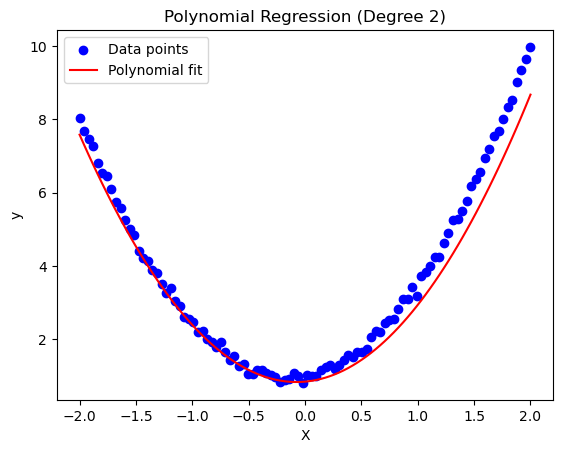

In [116]:
# Exercise 21

import numpy as np
import matplotlib.pyplot as plt

# Generate non-linear data
np.random.seed(42)
n_samples = 100
X = np.linspace(-2, 2, n_samples)  
true_theta0, true_theta1, true_theta2 = 1, 0.5, 2  
y = true_theta0 + true_theta1 * X + true_theta2 * X**2 + np.random.normal(0, 0.1, n_samples)  
class PolynomialRegression:
    def __init__(self, degree=2, learning_rate=0.01, max_iterations=1000, tolerance=1e-2):
        self.degree = degree
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.theta = np.zeros(degree + 1)  
    
    def transform_features(self, X):
        X_poly = np.ones((len(X), self.degree + 1))
        for d in range(1, self.degree + 1):
            X_poly[:, d] = X ** d
        return X_poly
    
    def predict(self, X):
        X_poly = self.transform_features(X)
        return np.dot(X_poly, self.theta)
    
    def compute_cost(self, X, y):
        n = len(X)
        predictions = self.predict(X)
        return (1/(2*n)) * np.sum((predictions - y) ** 2)
    
    def compute_r2(self, X, y):
        predictions = self.predict(X)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        ss_res = np.sum((y - predictions) ** 2)
        return 1 - (ss_res / ss_tot)
    
    def fit(self, X, y):
        n = len(X)
        X_poly = self.transform_features(X)
        cost_history = []
        
        for iteration in range(self.max_iterations):
            predictions = self.predict(X)
            
            # Compute gradients for each parameter
            gradients = np.zeros(self.degree + 1)
            for j in range(self.degree + 1):
                gradients[j] = (1/n) * np.sum((predictions - y) * X_poly[:, j])
            
            # Update parameters
            self.theta -= self.learning_rate * gradients
            
            # Compute cost
            cost = self.compute_cost(X, y)
            cost_history.append(cost)
            
            # Check convergence
            if iteration > 0 and abs(cost_history[-2] - cost_history[-1]) < self.tolerance:
                print(f"Converged at iteration {iteration}")
                break
                
            if iteration % 100 == 0:
                print(f"Iteration {iteration}, Cost: {cost:.4f}")
        
        return cost_history

# Train the model
model = PolynomialRegression(degree=2, learning_rate=0.01, max_iterations=1000)
cost_history = model.fit(X, y)

# Results
r2__score = model.compute_r2(X, y)
print(f"Final parameters: {model.theta}")
print(f"Final cost: {cost_history[-1]:.4f}")
print(f"R² score: {r2__score:.4f}")

# Visualize the results
y_pred = model.predict(X)
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Polynomial fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()

In [118]:
# Exercise 22
from sklearn.metrics import r2_score

data = pd.read_csv("House price prediction data.csv")

X = data.drop('price', axis=1)
y = data['price']

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'preferred area (city center)', 'furnishingstatus']
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Calculate Adjusted R²
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n_train = X_train.shape[0] 
n_test = X_test.shape[0]    
p = X_train.shape[1]        

adjusted_r2_train = adjusted_r2(r2_train, n_train, p)
adjusted_r2_test = adjusted_r2(r2_test, n_test, p)

# Print results
print("Model Coefficients:")
for feature, coef in zip(X_encoded.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}\n")

print(f"Training R²: {r2_train:.4f}")
print(f"Testing R²: {r2_test:.4f}")
print(f"Training Adjusted R²: {adjusted_r2_train:.4f}")
print(f"Testing Adjusted R²: {adjusted_r2_test:.4f}")

# Feature importance (absolute coefficients)
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': np.abs(model.coef_)
}).sort_values('Coefficient', ascending=False)
print("\nFeature Importance (based on absolute coefficients):")
print(feature_importance)

Model Coefficients:
area: 519552.4163
bedrooms: 57349.5594
bathrooms: 521879.0277
stories: 349251.4389
parking: 192005.9537
mainroad_yes: 367919.9477
guestroom_yes: 231610.0372
basement_yes: 390251.1762
hotwaterheating_yes: 684649.8853
airconditioning_yes: 791426.7358
preferred area (city center)_yes: 629890.5653
furnishingstatus_semi-furnished: -126881.8176
furnishingstatus_unfurnished: -413645.0622
Intercept: 3969403.5566

Training R²: 0.6859
Testing R²: 0.6529
Training Adjusted R²: 0.6763
Testing Adjusted R²: 0.6054

Feature Importance (based on absolute coefficients):
                             Feature    Coefficient
9                airconditioning_yes  791426.735843
8                hotwaterheating_yes  684649.885339
10  preferred area (city center)_yes  629890.565313
2                          bathrooms  521879.027748
0                               area  519552.416340
12      furnishingstatus_unfurnished  413645.062228
7                       basement_yes  390251.176181
5    

Model Coefficients: [1.65085005 1.71875064]
Intercept: -3.5368

Training Accuracy: 0.9250
Testing Accuracy: 0.9500

Confusion Matrix:
[[19  2]
 [ 0 19]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        21
         1.0       0.90      1.00      0.95        19

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



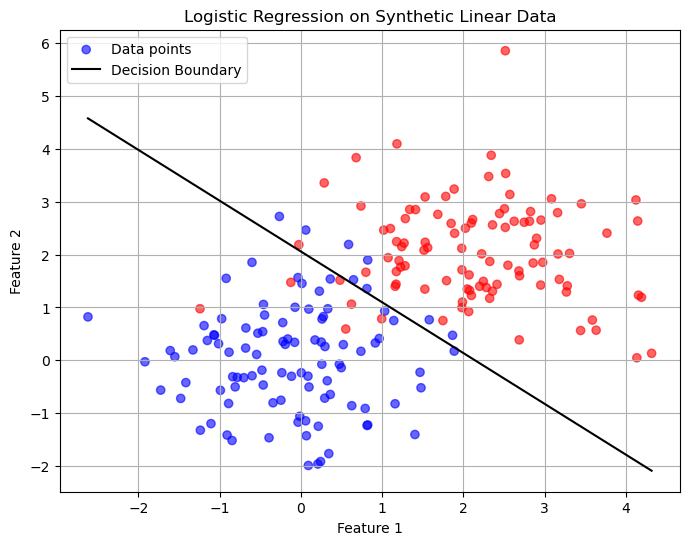

In [120]:
# Exercise 23

np.random.seed(42)
n_samples = 200

X0 = np.random.randn(n_samples // 2, 2)  
y0 = np.zeros(n_samples // 2)

X1 = np.random.randn(n_samples // 2, 2) + np.array([2, 2])  # Shifted
y1 = np.ones(n_samples // 2)

X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print(f"Model Coefficients: {model.coef_[0]}")
print(f"Intercept: {model.intercept_[0]:.4f}\n")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.6, label='Data points')

x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
w = model.coef_[0]
b = model.intercept_[0]
decision_boundary = -(w[0] * x_range + b) / w[1]  # From w1*x1 + w2*x2 + b = 0
plt.plot(x_range, decision_boundary, 'k-', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression on Synthetic Linear Data')
plt.legend()
plt.grid(True)
plt.show()

Model Coefficients: [ 1.48107284 -1.075674  ]
Intercept: -0.2043

Training Accuracy: 0.7188
Testing Accuracy: 0.8000

Confusion Matrix:
[[17  4]
 [ 4 15]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81        21
         1.0       0.79      0.79      0.79        19

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



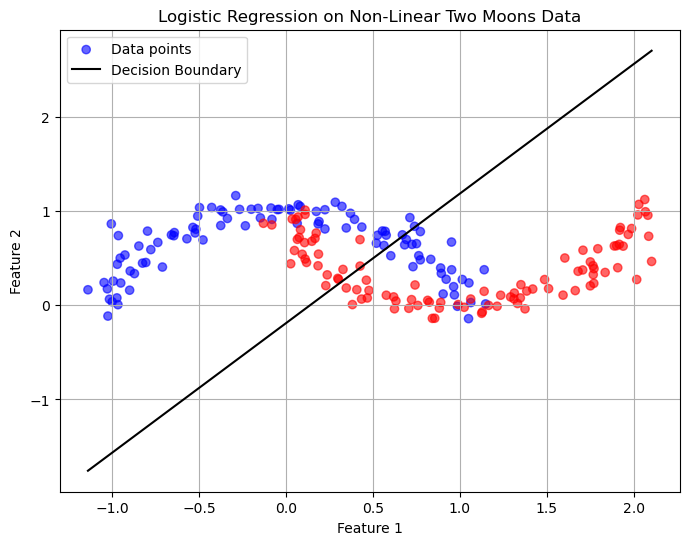

In [103]:
# Exercise 24
np.random.seed(42)
n_samples = 200

theta0 = np.linspace(0, np.pi, n_samples // 2)
r0 = 1
x0 = r0 * np.cos(theta0) + np.random.normal(0, 0.1, n_samples // 2)
y0 = r0 * np.sin(theta0) + np.random.normal(0, 0.1, n_samples // 2)
X0 = np.column_stack((x0, y0))
y0_labels = np.zeros(n_samples // 2)

theta1 = np.linspace(0, np.pi, n_samples // 2)
r1 = 1
x1 = r1 * np.cos(theta1 + np.pi) + 1 + np.random.normal(0, 0.1, n_samples // 2)  # Shifted by 1
y1 = r1 * np.sin(theta1 + np.pi) + 1 + np.random.normal(0, 0.1, n_samples // 2)  # Shifted by 1
X1 = np.column_stack((x1, y1))
y1_labels = np.ones(n_samples // 2)

X = np.vstack((X0, X1))
y = np.hstack((y0_labels, y1_labels))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print(f"Model Coefficients: {model.coef_[0]}")
print(f"Intercept: {model.intercept_[0]:.4f}\n")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.6, label='Data points')

x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
w = model.coef_[0]
b = model.intercept_[0]
decision_boundary = -(w[0] * x_range + b) / w[1]  # Linear boundary: w1*x1 + w2*x2 + b = 0
plt.plot(x_range, decision_boundary, 'k-', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression on Non-Linear Two Moons Data')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
# Exercise 25

print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)  

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, random_state=42)  # 0.1111 of 90% ≈ 10%

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.1, 1, 10],          
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']  
}

subset_size = 5000  
X_train_subset = X_train_scaled[:subset_size]
y_train_subset = y_train[:subset_size]

print("Performing hyperparameter tuning...")
start_time = time.time()
svm = SVC(decision_function_shape='ovr')  
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_subset, y_train_subset)
print(f"Tuning time: {time.time() - start_time:.2f} seconds")

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best validation accuracy during tuning: {best_score:.4f}")

print("Training final model on full training set...")
start_time = time.time()
final_model = SVC(**best_params, decision_function_shape='ovr')
final_model.fit(X_train_scaled, y_train)
print(f"Training time: {time.time() - start_time:.2f} seconds")

y_val_pred = final_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)

y_test_pred = final_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Loading MNIST dataset...
Training set size: 56000
Validation set size: 7000
Test set size: 7000
Performing hyperparameter tuning...
Tuning time: 226.78 seconds
Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best validation accuracy during tuning: 0.9296
Training final model on full training set...
Training time: 482.51 seconds

Validation Accuracy: 0.9750
Test Accuracy: 0.9696


Training Accuracy: 1.0000
Testing Accuracy: 1.0000

Confusion Matrix:
[[21  0]
 [ 0 19]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



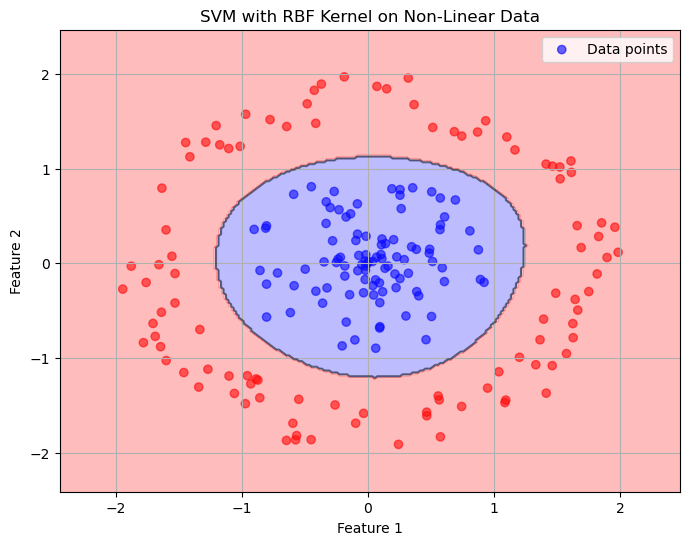

In [105]:
# Exercise 26

np.random.seed(42)
n_samples = 200

theta0 = np.random.uniform(0, 2 * np.pi, n_samples // 2)
r0 = np.random.uniform(0, 1, n_samples // 2)
X0 = np.column_stack((r0 * np.cos(theta0), r0 * np.sin(theta0)))
y0 = np.zeros(n_samples // 2)

theta1 = np.random.uniform(0, 2 * np.pi, n_samples // 2)
r1 = np.random.uniform(1.5, 2, n_samples // 2)
X1 = np.column_stack((r1 * np.cos(theta1), r1 * np.sin(theta1)))
y1 = np.ones(n_samples // 2)

X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.6, label='Data points')

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with RBF Kernel on Non-Linear Data')
plt.legend()
plt.grid(True)
plt.show()